In [162]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import warnings

from sklearn.linear_model import LinearRegression
from sklearn.metrics import r2_score as r2
from sklearn.metrics import mean_squared_error as mse
from sklearn.neighbors import KNeighborsRegressor as KNN
from sklearn.ensemble import RandomForestRegressor as RF


from sklearn.preprocessing import Normalizer


from sklearn.model_selection import train_test_split, RandomizedSearchCV, cross_val_score

warnings.filterwarnings('ignore')

%matplotlib inline
%config InlineBackend.figure_format = 'svg'

In [2]:
pd.options.display.max_rows = 100
pd.options.display.max_columns = 100
color = sns.color_palette()
sns.set()

In [3]:
data = pd.read_csv('train.csv')
test = pd.read_csv('test.csv')

In [4]:
#data = data.drop(['Healthcare_1'], axis=1)
#test = test.drop(['Healthcare_1'], axis=1)

In [5]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 10000 entries, 0 to 9999
Data columns (total 20 columns):
Id               10000 non-null int64
DistrictId       10000 non-null int64
Rooms            10000 non-null float64
Square           10000 non-null float64
LifeSquare       7887 non-null float64
KitchenSquare    10000 non-null float64
Floor            10000 non-null int64
HouseFloor       10000 non-null float64
HouseYear        10000 non-null int64
Ecology_1        10000 non-null float64
Ecology_2        10000 non-null object
Ecology_3        10000 non-null object
Social_1         10000 non-null int64
Social_2         10000 non-null int64
Social_3         10000 non-null int64
Healthcare_1     5202 non-null float64
Helthcare_2      10000 non-null int64
Shops_1          10000 non-null int64
Shops_2          10000 non-null object
Price            10000 non-null float64
dtypes: float64(8), int64(9), object(3)
memory usage: 1.5+ MB


In [6]:
data.head()

,Id,DistrictId,Rooms,Square,LifeSquare,KitchenSquare,Floor,HouseFloor,HouseYear,Ecology_1,Ecology_2,Ecology_3,Social_1,Social_2,Social_3,Healthcare_1,Helthcare_2,Shops_1,Shops_2,Price
0,14038,35,2.0,47.981561,29.442751,6.0,7,9.0,1969,0.089040,B,B,33,7976,5,NaN,0,11,B,184966.930730
1,15053,41,3.0,65.683640,40.049543,8.0,7,9.0,1978,0.000070,B,B,46,10309,1,240.0,1,16,B,300009.450063
2,4765,53,2.0,44.947953,29.197612,0.0,8,12.0,1968,0.049637,B,B,34,7759,0,229.0,1,3,B,220925.908524
3,5809,58,2.0,53.352981,52.731512,9.0,8,17.0,1977,0.437885,B,B,23,5735,3,1084.0,0,5,B,175616.227217
4,10783,99,1.0,39.649192,23.776169,7.0,11,12.0,1976,0.012339,B,B,35,5776,1,2078.0,2,4,B,150226.531644


In [7]:
data.describe()

,Id,DistrictId,Rooms,Square,LifeSquare,KitchenSquare,Floor,HouseFloor,HouseYear,Ecology_1,Social_1,Social_2,Social_3,Healthcare_1,Helthcare_2,Shops_1,Price
count,10000.00000,10000.000000,10000.000000,10000.000000,7887.000000,10000.000000,10000.000000,10000.000000,1.000000e+04,10000.000000,10000.000000,10000.000000,10000.000000,5202.000000,10000.000000,10000.000000,10000.000000
mean,8383.40770,50.400800,1.890500,56.315775,37.199645,6.273300,8.526700,12.609400,3.990166e+03,0.118858,24.687000,5352.157400,8.039200,1142.904460,1.319500,4.231300,214138.857399
std,4859.01902,43.587592,0.839512,21.058732,86.241209,28.560917,5.241148,6.775974,2.005003e+05,0.119025,17.532614,4006.799803,23.831875,1021.517264,1.493601,4.806341,92872.293865
min,0.00000,0.000000,0.000000,1.136859,0.370619,0.000000,1.000000,0.000000,1.910000e+03,0.000000,0.000000,168.000000,0.000000,0.000000,0.000000,0.000000,59174.778028
25%,4169.50000,20.000000,1.000000,41.774881,22.769832,1.000000,4.000000,9.000000,1.974000e+03,0.017647,6.000000,1564.000000,0.000000,350.000000,0.000000,1.000000,153872.633942
50%,8394.50000,36.000000,2.000000,52.513310,32.781260,6.000000,7.000000,13.000000,1.977000e+03,0.075424,25.000000,5285.000000,2.000000,900.000000,1.000000,3.000000,192269.644879
75%,12592.50000,75.000000,2.000000,65.900625,45.128803,9.000000,12.000000,17.000000,2.001000e+03,0.195781,36.000000,7227.000000,5.000000,1548.000000,2.000000,6.000000,249135.462171
max,16798.00000,209.000000,19.000000,641.065193,7480.592129,2014.000000,42.000000,117.000000,2.005201e+07,0.521867,74.000000,19083.000000,141.000000,4849.000000,6.000000,23.000000,633233.466570


## Приведение типов

Этажей как и квартир с дробным значением нет, поэтому можно поменять тип.  
Это положительно сказалось на модели

In [8]:
data['HouseFloor'] = data['HouseFloor'].astype(np.int64)
data['Rooms'] = data['Rooms'].astype(np.int64)

# Разделение даты на тренировочную и валидационную выборку

In [9]:
train, valid = train_test_split(data, test_size=0.3, random_state=42)

# Визуализация исходных данных

Визуализацию вынес в отдельный notebook для удобства

# Чистка ошибочных данных и выбросов

## Выбросы кол-ва комнат

In [10]:
train.loc[train['Rooms'] > 6, ['Rooms', 'Square']]

,Rooms,Square
1454,19,42.006046
377,10,59.056975


In [11]:
valid.loc[valid['Rooms'] > 6, ['Rooms', 'Square']]

,Rooms,Square
8849,10,60.871266


In [12]:
train.groupby('Rooms')[['Square', 'Price']].mean()

,Square,Price
Rooms,,
0,62.714154,184599.160110
1,41.366349,160134.810901
2,56.808238,215287.628931
3,77.128820,290867.452543
4,98.651884,385776.526291
5,103.645574,386743.536446
6,59.414334,229661.964416
10,59.056975,317265.323792
19,42.006046,78364.616704


Площадь не соответствует квадратуре, и цене. Заменю средним значением

In [13]:
train.loc[train['Rooms'] > 6, 'Rooms'] = 3
valid.loc[valid['Rooms'] > 6, 'Rooms'] = 3

На тесте данные аналогичные

In [14]:
test.loc[test['Rooms'] > 6, ['Rooms', 'Square']]

,Rooms,Square
3398,17.0,52.866107


In [15]:
test.groupby('Rooms')[['Square']].mean()

,Square
Rooms,
0.0,96.584677
1.0,40.943143
2.0,56.689144
3.0,77.201304
4.0,94.501365
5.0,115.788971
6.0,167.101957
17.0,52.866107


In [16]:
test.loc[test['Rooms'] > 6, 'Rooms'] = 3

## Площадь

In [17]:
train.loc[train['Square'] > 300, ['Square', 'Rooms', 'Price', 'DistrictId', 'Id']]

,Square,Rooms,Price,DistrictId,Id
4262,604.705972,2,187717.242538,9,28
4690,409.425181,1,90470.430830,102,2307


In [18]:
train.loc[train['Id'] == 28, 'Square'] = train.loc[(train['Rooms'] == 2) & (train['DistrictId'] == 9), 'Square'].mean()
train.loc[train['Id'] == 2307, 'Square'] = train.loc[(train['Rooms'] == 1) & (train['DistrictId'] == 102), 'Square'].mean()

In [19]:
valid.loc[valid['Square'] > 300, ['Square', 'Rooms', 'Price', 'DistrictId', 'Id']]

,Square,Rooms,Price,DistrictId,Id
6977,641.065193,2,133529.681562,30,11602


In [20]:
valid.loc[valid['Id'] == 11602, 'Square'] = train.loc[(train['Rooms'] == 2) & (train['DistrictId'] == 30), 'Square'].mean()

In [21]:
test.loc[test['Square'] > 200, ['Square', 'Rooms','DistrictId', 'Id']]

,Square,Rooms,DistrictId,Id
3217,223.453689,6.0,27,4058
3909,221.138768,3.0,76,1397


In [22]:
test.loc[test['Id'] == 1397, 'Square'] = train.loc[(train['Rooms'] == 3) & (train['DistrictId'] == 76), 'Square'].mean()

### Поиск малых значений

In [23]:
valid.loc[valid['Square'] < 13, ['Square', 'Rooms', 'Price', 'DistrictId', 'Id']]

,Square,Rooms,Price,DistrictId,Id
4900,4.390331,3,161379.067034,27,4504
8283,1.988943,1,458378.777006,34,15744
1608,2.596351,1,137597.601458,6,10202
212,5.497061,2,412511.088764,88,1748
6392,1.136859,1,181434.825589,1,14786


### очень малое значение площади, для проверки надо создать словарь средних площадей

In [24]:
train_dict = {
    'district_mean_square': train.groupby(['DistrictId', 'Rooms'])[['Square']].mean().reset_index().rename(columns={'Square':'district_mean_square'}),
    'district_mean_price': train.groupby(['DistrictId', 'Rooms'])[['Price']].mean().reset_index().rename(columns={'Price':'district_mean_price'}),
}

### мердж данных в DF

In [25]:
train = pd.merge(train, train_dict['district_mean_square'], on=['DistrictId', 'Rooms'], how='left')
train = pd.merge(train, train_dict['district_mean_price'], on=['DistrictId', 'Rooms'], how='left')
valid = pd.merge(valid, train_dict['district_mean_square'], on=['DistrictId', 'Rooms'], how='left')
test = pd.merge(test, train_dict['district_mean_square'], on=['DistrictId', 'Rooms'], how='left')

### сравнение со средними

In [26]:
train.loc[train['Square'] < 13, ['Rooms', 'Price', 'Square','district_mean_square', 'district_mean_price', 'LifeSquare']]

,Rooms,Price,Square,district_mean_square,district_mean_price,LifeSquare
554,1,369472.403061,5.129222,36.229417,256806.516354,5.549458
873,1,97560.720383,4.380726,42.573792,123555.916178,40.805837
1675,3,237716.681261,4.823679,82.060899,245205.379553,79.767964
5187,1,483283.488083,4.502784,46.297136,272595.961807,4.618547
5254,1,107604.269441,4.633498,42.573792,123555.916178,1.969969
5843,0,126596.941798,2.377248,60.865274,164373.887658,0.873147
6036,1,438005.182323,2.954309,40.330637,228773.187700,5.257278


In [27]:
train.loc[train['Square'] < 13, 'Square'] = train['district_mean_square']

In [28]:
valid.loc[valid['Square'] < 13, ['Rooms', 'Square','district_mean_square']]

,Rooms,Square,district_mean_square
691,3,4.390331,80.469616
739,1,1.988943,39.420921
872,1,2.596351,43.932481
1365,2,5.497061,51.667014
1880,1,1.136859,43.718832


In [29]:
valid.loc[valid['Square'] < 13, 'Square'] = valid['district_mean_square']

In [30]:
test.loc[test['Square'] < 13, ['Rooms', 'Square','district_mean_square']]

,Rooms,Square,district_mean_square
66,1.0,1.378543,38.411975
608,1.0,2.645046,44.521862
837,1.0,5.647458,42.573792
1165,1.0,5.100672,43.932481
4490,1.0,2.372101,42.573792
4540,1.0,4.967143,43.932481
4713,2.0,2.900586,62.383205
4902,1.0,1.975769,40.330637


In [31]:
test.loc[test['Square'] < 13, 'Square'] = test['district_mean_square']

## Нежилое помещение

Предположение, если не заполнена жилая площадь и площадь кухни, то это не жилое помещение.  
Использую для технических нужд, мб пригодится в модели.

In [32]:
train['NotForLife'] = ((train['LifeSquare'].isnull()) & (train['KitchenSquare'] == 0)).astype(int)

In [33]:
valid['NotForLife'] = ((valid['LifeSquare'].isnull()) & (valid['KitchenSquare'] == 0)).astype(int)

In [34]:
test['NotForLife'] = ((test['LifeSquare'].isnull()) & (test['KitchenSquare'] == 0)).astype(int)

## Жилая площадь

### Большие значения

In [35]:
train.loc[train['LifeSquare'] > 250, ['LifeSquare', 'Square', 'Rooms', 'Price', 'district_mean_square']]

,LifeSquare,Square,Rooms,Price,district_mean_square
942,7480.592129,81.694417,3,217357.492366,80.469616
1547,461.463614,78.059331,3,394253.299978,72.335148
2825,410.639749,226.291341,1,90470.430830,134.724422


Так как значений мало, занулим данные значения

In [36]:
train.loc[train['LifeSquare'] > 250, 'LifeSquare'] = np.NaN

In [37]:
valid.loc[valid['LifeSquare'] > 250, ['LifeSquare', 'Square', 'Rooms', 'district_mean_square']]

,LifeSquare,Square,Rooms,district_mean_square
485,638.163193,65.127062,2,65.127062
537,263.542020,48.449873,2,60.877232


In [38]:
valid.loc[valid['LifeSquare'] > 250, 'LifeSquare'] = np.NaN

In [39]:
test.loc[test['LifeSquare'] > 250, ['LifeSquare', 'Square', 'Rooms', 'district_mean_square']]

,LifeSquare,Square,Rooms,district_mean_square
410,303.071094,48.713443,2.0,50.516024


In [40]:
test.loc[test['LifeSquare'] > 250, 'LifeSquare'] = np.NaN

### Малые значения

In [41]:
train.loc[train['LifeSquare'] < 10, ['LifeSquare', 'Square', 'Rooms', 'Price','district_mean_square']]

,LifeSquare,Square,Rooms,Price,district_mean_square
14,2.286357,63.419553,1,325600.765809,40.330637
20,1.451067,104.446306,3,223692.672480,91.544821
39,5.336872,68.896696,2,338780.798345,56.035256
93,3.411048,49.635712,1,146838.036852,47.918564
133,2.372105,39.225914,1,271893.118572,40.330637
197,3.666085,83.190541,3,221683.641204,79.874558
249,4.337395,81.380553,3,196743.389597,80.469616
273,4.699898,37.387578,1,109553.129485,44.521862
315,5.815532,58.161484,2,138905.568311,63.873450
356,2.093332,43.259451,1,129781.342708,42.383001


In [42]:
train.loc[train['LifeSquare'] < 10, 'LifeSquare'] = np.NaN

In [43]:
valid.loc[valid['LifeSquare'] < 10, ['LifeSquare', 'Square', 'Rooms', 'Price','district_mean_square']]

,LifeSquare,Square,Rooms,Price,district_mean_square
2,3.977650,82.882978,3,219945.304640,79.874558
117,5.822657,38.651043,1,103210.010325,42.573792
142,1.538058,50.022583,1,130720.196859,45.731261
277,5.948864,66.942469,2,183976.840021,57.879637
355,4.605527,42.555286,1,121435.137257,42.573792
372,1.549931,38.005975,1,107147.609125,45.731261
475,5.871816,50.873129,1,149885.229628,42.573792
476,4.575279,91.948656,3,451714.464410,90.527166
511,3.668460,43.613432,1,128710.472293,43.932481
567,1.855415,36.112393,1,94881.691800,42.573792


In [44]:
valid.loc[valid['LifeSquare'] < 10, 'LifeSquare'] = np.NaN

In [45]:
test.loc[test['LifeSquare'] < 10, ['LifeSquare', 'Square', 'Rooms', 'district_mean_square']]

,LifeSquare,Square,Rooms,district_mean_square
18,5.690155,82.652818,3.0,80.469616
66,1.353573,38.411975,1.0,38.411975
71,4.188395,85.911827,2.0,53.469022
77,3.798341,59.927502,2.0,59.938799
78,0.333490,122.375273,5.0,121.577423
153,5.589869,105.351051,3.0,75.949984
237,2.132381,56.688460,1.0,41.407428
259,2.366869,81.003455,3.0,81.879267
325,2.912992,48.674779,1.0,42.573792
326,1.181139,64.112441,2.0,63.201979


In [46]:
test.loc[test['LifeSquare'] < 10, 'LifeSquare'] = np.NaN

Заполнять пустые данные ниже

## Площадь кухни

### Больщие значения

Тоже будет нужен словарь средних значений, но много выбросов, сначала почистить их

In [47]:
train.loc[train['KitchenSquare'] > 35, ['LifeSquare', 'Square', 'KitchenSquare', 'Rooms', 'Price', 'district_mean_square']]

,LifeSquare,Square,KitchenSquare,Rooms,Price,district_mean_square
452,19.278394,32.276663,1970.0,1,105539.556275,38.880155
472,138.004600,138.980817,43.0,3,169528.896664,83.053562
524,44.731219,79.722243,72.0,3,370148.625285,74.195073
1729,113.109653,116.405693,112.0,3,296165.936689,83.053562
2004,24.224435,42.983283,37.0,1,198450.736353,37.186682
2188,59.845092,61.070298,58.0,2,212188.959537,63.873450
2449,53.134243,51.440463,51.0,2,88150.012510,60.877232
2722,43.417043,46.013187,43.0,1,113909.099428,45.731261
2923,99.323558,97.490674,96.0,3,445074.956552,76.673483
3058,46.447960,47.100719,2014.0,1,108337.484207,45.731261


In [48]:
train.loc[train['KitchenSquare'] > 35, ['KitchenSquare']] = np.NaN

In [49]:
valid.loc[valid['KitchenSquare'] > 35, ['LifeSquare', 'Square', 'KitchenSquare', 'Rooms', 'Price', 'district_mean_square']]

,LifeSquare,Square,KitchenSquare,Rooms,Price,district_mean_square
780,36.710539,36.138409,36.0,1,131742.536281,42.573792
1040,64.234956,68.841073,66.0,2,189244.249909,63.873450
1602,64.616662,66.787523,60.0,2,179466.094235,63.873450
1672,47.146757,78.445675,75.0,3,290354.484070,80.372619
1810,NaN,41.186904,41.0,1,216882.265408,40.034190
2105,42.835643,43.292516,40.0,1,117296.173704,42.573792
2605,32.644859,53.216778,53.0,2,261125.669724,NaN
2656,45.023531,48.128114,48.0,1,146950.912410,43.932481


In [50]:
valid.loc[valid['KitchenSquare'] > 35, ['KitchenSquare']] = np.NaN

In [51]:
test.loc[test['KitchenSquare'] > 35, ['LifeSquare', 'Square', 'KitchenSquare', 'Rooms', 'district_mean_square']]

,LifeSquare,Square,KitchenSquare,Rooms,district_mean_square
40,NaN,62.326044,61.0,2.0,63.873450
803,89.790274,139.045763,42.0,5.0,NaN
870,91.704806,141.540215,42.0,1.0,42.573792
1447,92.484098,138.039182,42.0,2.0,63.873450
1456,51.247581,69.358242,65.0,3.0,68.416428
1777,112.247841,112.114019,112.0,3.0,91.544821
1964,24.223770,42.795304,620.0,2.0,49.859195
3723,45.672140,41.951462,41.0,1.0,45.731261
3816,33.646726,60.988496,60.0,2.0,63.873450
3863,31.028707,43.926987,44.0,2.0,46.144367


In [52]:
test.loc[test['KitchenSquare'] > 35, 'KitchenSquare'] = np.NaN

### Поиск малых значений

In [53]:
train.loc[train['KitchenSquare'] < 2, ['LifeSquare', 'Square', 'KitchenSquare', 'Rooms', 'Price', 'district_mean_square']]

,LifeSquare,Square,KitchenSquare,Rooms,Price,district_mean_square
3,98.152802,96.056784,1.0,3,524365.550705,81.502126
5,NaN,127.417560,0.0,3,282877.332154,91.544821
14,NaN,63.419553,1.0,1,325600.765809,40.330637
18,41.782263,42.106365,1.0,1,138632.726757,43.718832
20,NaN,104.446306,1.0,3,223692.672480,91.544821
21,NaN,81.097858,1.0,3,243193.220757,82.060899
22,35.287517,35.770587,1.0,1,72962.598347,43.285976
25,38.536728,42.648865,0.0,1,159350.917190,43.718832
31,NaN,64.139262,1.0,2,182427.132446,57.879637
33,81.668797,80.288769,0.0,3,181796.476207,81.665527


In [54]:
train.loc[train['KitchenSquare'] < 2, 'KitchenSquare'] = np.NaN

In [55]:
valid.loc[valid['KitchenSquare'] < 2, ['LifeSquare', 'Square', 'KitchenSquare', 'Rooms', 'Price', 'district_mean_square']]

,LifeSquare,Square,KitchenSquare,Rooms,Price,district_mean_square
2,NaN,82.882978,1.0,3,219945.304640,79.874558
3,29.993297,33.863324,0.0,1,66883.280318,43.285976
4,NaN,43.095135,1.0,1,114086.065201,40.764461
7,30.155171,33.521641,1.0,1,381912.162109,39.503463
8,42.182049,40.696294,1.0,1,133072.279471,43.932481
14,43.429296,43.990708,0.0,1,158693.839439,47.918564
16,56.542921,58.959447,1.0,1,345310.951954,44.782965
19,NaN,53.317372,1.0,2,109890.139020,60.877232
21,NaN,60.001130,0.0,1,198345.433642,43.718832
23,NaN,47.347306,1.0,1,97300.152929,43.285976


In [56]:
valid.loc[valid['KitchenSquare'] < 2, 'KitchenSquare'] = np.NaN

In [57]:
test.loc[test['KitchenSquare'] < 2, ['LifeSquare', 'Square', 'KitchenSquare', 'Rooms', 'Price', 'district_mean_square']]

,LifeSquare,Square,KitchenSquare,Rooms,Price,district_mean_square
1,NaN,69.263183,1.0,2.0,NaN,75.421766
4,43.387569,47.527111,1.0,1.0,NaN,42.573792
5,NaN,40.675627,1.0,1.0,NaN,38.411975
6,64.843025,68.099538,1.0,2.0,NaN,60.877232
11,NaN,84.625350,1.0,3.0,NaN,79.874558
14,NaN,37.555197,1.0,1.0,NaN,42.573792
18,NaN,82.652818,1.0,3.0,NaN,80.469616
21,NaN,44.878767,1.0,1.0,NaN,43.718832
22,46.358356,83.670032,0.0,3.0,NaN,80.469616
24,NaN,69.849239,0.0,2.0,NaN,63.873450


In [58]:
test.loc[test['KitchenSquare'] < 2, 'KitchenSquare'] = np.NaN

## Создание словаря для кухни и жилой площади

In [59]:
train_dict['district_mean_life'] = train.groupby(['DistrictId', 'Rooms'])[['LifeSquare']].mean().reset_index().rename(columns={'LifeSquare':'district_mean_life'})
train_dict['district_mean_kitchen'] = train.groupby(['DistrictId', 'Rooms'])[['KitchenSquare']].mean().reset_index().rename(columns={'KitchenSquare':'district_mean_kitchen'})

In [60]:
train.head()

,Id,DistrictId,Rooms,Square,LifeSquare,KitchenSquare,Floor,HouseFloor,HouseYear,Ecology_1,Ecology_2,Ecology_3,Social_1,Social_2,Social_3,Healthcare_1,Helthcare_2,Shops_1,Shops_2,Price,district_mean_square,district_mean_price,NotForLife
0,14604,23,1,41.681380,22.796166,8.0,14,17,2015,0.075779,B,B,6,1437,3,NaN,0,2,B,88504.384965,43.285976,102427.030975,0
1,5621,23,3,163.495333,161.504222,12.0,5,3,1977,0.014073,B,B,2,475,0,NaN,0,0,B,207007.956663,81.879267,165911.129700,0
2,235,87,1,39.710131,19.538663,8.0,4,17,1986,0.100456,B,B,43,7227,0,NaN,1,6,A,182126.280899,38.546775,169596.630515,0
3,16258,48,3,96.056784,98.152802,NaN,15,1,2017,0.041125,B,B,46,9515,5,NaN,1,10,B,524365.550705,81.502126,382424.639356,0
4,10773,77,3,79.195825,44.421062,10.0,16,17,1984,0.298205,B,B,16,4048,3,NaN,1,3,B,322048.433990,64.254910,251751.766701,0


In [61]:
train = pd.merge(train, train_dict['district_mean_life'], on=['DistrictId', 'Rooms'], how='left')
valid = pd.merge(valid, train_dict['district_mean_life'], on=['DistrictId', 'Rooms'], how='left')
test = pd.merge(test, train_dict['district_mean_life'], on=['DistrictId', 'Rooms'], how='left')

train = pd.merge(train, train_dict['district_mean_kitchen'], on=['DistrictId', 'Rooms'], how='left')
valid = pd.merge(valid, train_dict['district_mean_kitchen'], on=['DistrictId', 'Rooms'], how='left')
test = pd.merge(test, train_dict['district_mean_kitchen'], on=['DistrictId', 'Rooms'], how='left')

Вставка пропущенных значений

In [62]:
valid.loc[valid['district_mean_life'].isnull(),:]

,Id,DistrictId,Rooms,Square,LifeSquare,KitchenSquare,Floor,HouseFloor,HouseYear,Ecology_1,Ecology_2,Ecology_3,Social_1,Social_2,Social_3,Healthcare_1,Helthcare_2,Shops_1,Shops_2,Price,district_mean_square,NotForLife,district_mean_life,district_mean_kitchen
36,15288,46,4,105.436315,68.823042,10.0,23,22,1998,1.887838e-01,B,B,31,6137,4,NaN,0,1,B,405669.713224,NaN,0,NaN,NaN
43,4140,10,4,83.833387,64.946548,6.0,1,9,1969,8.903972e-02,B,B,33,7976,5,NaN,0,11,B,286261.566899,NaN,0,NaN,NaN
50,203,33,4,101.554252,22.630373,9.0,4,5,1958,5.194206e-02,B,B,17,4017,7,800.0,2,0,B,82342.775873,NaN,0,NaN,NaN
226,2418,154,3,95.564438,65.283248,9.0,5,5,1953,4.605564e-01,B,B,20,4386,14,NaN,1,5,B,411403.672200,NaN,0,NaN,NaN
254,14825,152,3,88.978324,56.939045,12.0,7,7,1958,4.203159e-02,B,B,37,6856,84,1940.0,2,5,B,85499.969325,NaN,0,NaN,NaN
314,2129,46,4,102.929692,64.606835,10.0,21,22,1985,1.887838e-01,B,B,31,6137,4,NaN,0,1,B,344789.615286,NaN,0,NaN,NaN
338,3159,88,0,38.697117,19.345131,9.0,9,16,1982,1.273759e-01,B,B,43,8429,3,NaN,3,9,B,158998.110646,NaN,0,NaN,NaN
361,2795,178,1,29.648057,16.555363,5.0,3,5,1958,4.605564e-01,B,B,20,4386,14,NaN,1,5,B,165953.912580,NaN,0,NaN,NaN
397,3837,41,4,69.039122,47.211759,6.0,10,9,1978,3.612229e-02,B,B,24,4378,0,1036.0,1,1,B,272097.771565,NaN,0,NaN,NaN
427,13857,41,4,64.740151,46.627687,5.0,4,9,1970,1.750549e-01,B,B,36,10055,3,NaN,1,0,B,270409.143159,NaN,0,NaN,NaN


In [63]:
def mean_null(df, tdf, lbl):
    for i in range(0, 11):
        df.loc[(df[lbl].isnull()) & (df['Rooms'] == i), lbl] = tdf.loc[tdf['Rooms'] == i, lbl].mean()
        df.loc[(df[lbl].isnull()) & (df['Rooms'] == i), lbl] = tdf[lbl].mean()
    return df

In [64]:
train = mean_null(train, train, 'district_mean_square')
valid = mean_null(valid, train, 'district_mean_square')
test = mean_null(test, train, 'district_mean_square')

train = mean_null(train, train, 'district_mean_kitchen')
valid = mean_null(valid, train, 'district_mean_kitchen')
test = mean_null(test, train, 'district_mean_kitchen')

train = mean_null(train, train, 'district_mean_life')
valid = mean_null(valid, train, 'district_mean_life')
test = mean_null(test, train, 'district_mean_life')

In [65]:
test.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 5000 entries, 0 to 4999
Data columns (total 23 columns):
Id                       5000 non-null int64
DistrictId               5000 non-null int64
Rooms                    5000 non-null float64
Square                   5000 non-null float64
LifeSquare               3848 non-null float64
KitchenSquare            3460 non-null float64
Floor                    5000 non-null int64
HouseFloor               5000 non-null float64
HouseYear                5000 non-null int64
Ecology_1                5000 non-null float64
Ecology_2                5000 non-null object
Ecology_3                5000 non-null object
Social_1                 5000 non-null int64
Social_2                 5000 non-null int64
Social_3                 5000 non-null int64
Healthcare_1             2623 non-null float64
Helthcare_2              5000 non-null int64
Shops_1                  5000 non-null int64
Shops_2                  5000 non-null object
district_mean_square 

In [66]:
train.loc[train['Rooms'] == 0, ['district_mean_life']].mean()

district_mean_life    136.215499
dtype: float64

In [67]:
train.loc[train['NotForLife'] == 1, ['KitchenSquare', 'LifeSquare']]

,KitchenSquare,LifeSquare
5,NaN,NaN
42,NaN,NaN
56,NaN,NaN
58,NaN,NaN
64,NaN,NaN
106,NaN,NaN
109,NaN,NaN
136,NaN,NaN
164,NaN,NaN
205,NaN,NaN


Для жилых средние значения

In [68]:
train.loc[train['LifeSquare'].isnull(), 'LifeSquare'] = train['district_mean_life']
valid.loc[valid['LifeSquare'].isnull(), 'LifeSquare'] = valid['district_mean_life']
test.loc[test['LifeSquare'].isnull(), 'LifeSquare'] = test['district_mean_life']

train.loc[train['KitchenSquare'].isnull(), 'KitchenSquare'] = train['district_mean_kitchen']
valid.loc[valid['KitchenSquare'].isnull(), 'KitchenSquare'] = valid['district_mean_kitchen']
test.loc[test['KitchenSquare'].isnull(), 'KitchenSquare'] = test['district_mean_kitchen']

## Год постройки

In [69]:
train.loc[train['HouseYear'] > 2020, ['LifeSquare', 'Square', 'KitchenSquare', 'Rooms', 'Price','HouseYear','DistrictId','Id']]

,LifeSquare,Square,KitchenSquare,Rooms,Price,HouseYear,DistrictId,Id
556,28.360393,44.791836,5.0,2,243028.603096,4968,147,11607
3507,20.239714,37.265070,9.0,1,254084.534396,20052011,109,10814


In [70]:
train.loc[train['Id'] == 11607, ['HouseYear']] = np.NaN
train.loc[train['Id'] == 10814, ['HouseYear']] = np.NaN

In [71]:
valid.loc[valid['HouseYear'] > 2020, ['LifeSquare', 'Square', 'KitchenSquare', 'Rooms', 'Price','HouseYear']]

,LifeSquare,Square,KitchenSquare,Rooms,Price,HouseYear


In [72]:
test.loc[test['HouseYear'] > 2020, ['LifeSquare', 'Square', 'KitchenSquare', 'Rooms', 'Price','HouseYear']]

,LifeSquare,Square,KitchenSquare,Rooms,Price,HouseYear


In [73]:
train.loc[train['HouseYear'] == 1970, ['LifeSquare', 'Square', 'KitchenSquare', 'Rooms', 'Price','HouseYear']]

,LifeSquare,Square,KitchenSquare,Rooms,Price,HouseYear
10,38.101494,52.264434,10.0,3,216094.268430,1970.0
78,27.954508,39.219848,6.0,2,162479.802200,1970.0
166,15.170851,18.509177,3.0,1,115845.861527,1970.0
189,20.852488,36.248642,10.0,1,200188.350556,1970.0
217,25.729218,43.183440,6.0,2,203646.504266,1970.0
257,31.581990,51.767198,8.0,2,238730.475489,1970.0
280,17.397469,35.314481,9.0,1,155751.134433,1970.0
500,22.060771,36.484660,6.0,1,186422.947885,1970.0
513,23.603388,35.714199,6.0,1,161307.525554,1970.0
584,30.481246,45.784688,5.0,2,225146.019331,1970.0


In [74]:
train.loc[train['HouseYear'] == 1970, ['HouseYear']] = np.NaN
valid.loc[valid['HouseYear'] == 1970, ['HouseYear']] = np.NaN
test.loc[test['HouseYear'] == 1970, ['HouseYear']] = np.NaN

train.loc[train['HouseYear'] == 1977, ['HouseYear']] = np.NaN
valid.loc[valid['HouseYear'] == 1977, ['HouseYear']] = np.NaN
test.loc[test['HouseYear'] == 1977, ['HouseYear']] = np.NaN

In [75]:
train_dict['district_mean_year'] = train.groupby('DistrictId')[['HouseYear']].mean().reset_index().rename(columns={'HouseYear':'district_mean_year'}).round().sort_values(by='district_mean_year')

In [76]:
train = pd.merge(train, train_dict['district_mean_year'], on=['DistrictId'], how='left')
valid = pd.merge(valid, train_dict['district_mean_year'], on=['DistrictId'], how='left')
test = pd.merge(test, train_dict['district_mean_year'], on=['DistrictId'], how='left')

In [77]:
train.loc[train['district_mean_year'].isnull(), 'district_mean_year'] = train['district_mean_year'].mean()
valid.loc[valid['district_mean_year'].isnull(), 'district_mean_year'] = train['district_mean_year'].mean()
test.loc[test['district_mean_year'].isnull(), 'district_mean_year'] = train['district_mean_year'].mean()

train.loc[train['HouseYear'].isnull(), 'HouseYear'] = train['district_mean_year']
valid.loc[valid['HouseYear'].isnull(), 'HouseYear'] = valid['district_mean_year']
test.loc[test['HouseYear'].isnull(), 'HouseYear'] = test['district_mean_year']

Text(0, 0.5, 'Price')

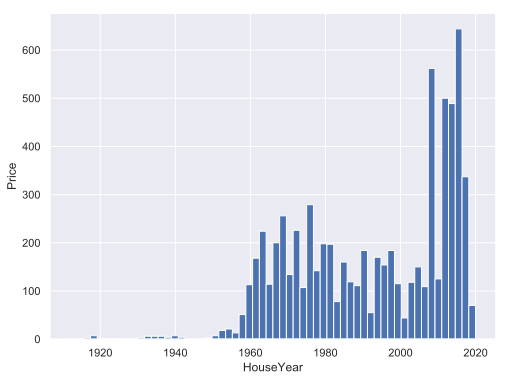

In [78]:
plt.figure(figsize=(8, 6))
plt.hist(train['HouseYear'], bins=60)
plt.xlabel('HouseYear')
plt.ylabel('Price')

## Этаж

In [79]:
train.loc[train['Floor'] > 30, ['Floor', 'HouseFloor','HouseYear', 'Rooms', 'Price', 'DistrictId','Id']]

,Floor,HouseFloor,HouseYear,Rooms,Price,DistrictId,Id
1162,32,32,2008.0,1,97480.845791,8,11563
1558,31,44,2009.0,1,117647.461002,30,6589
2339,42,48,2016.0,2,411691.504766,76,1674
5536,33,40,1979.0,1,389554.063540,31,8016
6401,32,40,1979.0,1,393799.531732,31,3298


In [80]:
valid.loc[valid['Floor'] > 30, ['Floor', 'HouseFloor','HouseYear', 'Rooms', 'Price', 'DistrictId','Id']]

,Floor,HouseFloor,HouseYear,Rooms,Price,DistrictId,Id
1660,37,38,2012.0,1,269113.584248,146,8296


In [81]:
test.loc[test['Floor'] > 30, ['Floor', 'HouseFloor','HouseYear', 'Rooms', 'Price', 'DistrictId','Id']]

,Floor,HouseFloor,HouseYear,Rooms,Price,DistrictId,Id
1587,38,48.0,2010.0,2.0,NaN,76,5707
3585,33,40.0,2014.0,2.0,NaN,31,4533
3711,46,48.0,2002.0,2.0,NaN,76,414
3909,32,48.0,2011.0,3.0,NaN,76,1397
4192,32,32.0,2009.0,1.0,NaN,8,13970
4549,31,40.0,2012.0,2.0,NaN,31,16166
4698,78,22.0,1989.0,2.0,NaN,17,15759
4764,34,37.0,2015.0,2.0,NaN,72,2461


In [82]:
train.loc[train['HouseFloor'] >= 50, ['Floor', 'HouseFloor','HouseYear', 'Rooms', 'Price', 'DistrictId','Id']]

,Floor,HouseFloor,HouseYear,Rooms,Price,DistrictId,Id
501,8,117,2011.0,2,207248.370520,30,78
1149,6,99,1980.0,1,296127.115515,5,10806
3201,5,99,2010.0,2,243329.912579,74,9300


In [83]:
train.loc[train['Id'] == 78, ['HouseFloor']] = train.loc[train['DistrictId'] == 30]['HouseFloor'].mean().round()
train.loc[train['Id'] == 10806, ['HouseFloor']] = train.loc[train['DistrictId'] == 5]['HouseFloor'].mean().round()
train.loc[train['Id'] == 9300, ['HouseFloor']] = train.loc[train['DistrictId'] == 74]['HouseFloor'].mean().round()
train.loc[train['Id'] == 9300, ['HouseFloor', 'Floor']]

,HouseFloor,Floor
3201,13.0,5


In [84]:
valid.loc[valid['HouseFloor'] >= 50, ['Floor', 'HouseFloor','HouseYear', 'Rooms', 'Price', 'DistrictId','Id']]

,Floor,HouseFloor,HouseYear,Rooms,Price,DistrictId,Id


In [85]:
test.loc[test['HouseFloor'] >= 50, ['Floor', 'HouseFloor','HouseYear', 'Rooms', 'Price', 'DistrictId','Id']]


,Floor,HouseFloor,HouseYear,Rooms,Price,DistrictId,Id
651,18,99.0,2011.0,3.0,NaN,27,15864


In [86]:
test.loc[test['Id'] == 15864, ['HouseFloor']] = 18
test.loc[test['Id'] == 15864, ['HouseFloor']]

,HouseFloor
651,18.0


# Поиск ошибок в данных

Жилая площадь больше, чем общая площадь

In [87]:
train.loc[train['LifeSquare'] > train['Square']].head()

,Id,DistrictId,Rooms,Square,LifeSquare,KitchenSquare,Floor,HouseFloor,HouseYear,Ecology_1,Ecology_2,Ecology_3,Social_1,Social_2,Social_3,Healthcare_1,Helthcare_2,Shops_1,Shops_2,Price,district_mean_square,district_mean_price,NotForLife,district_mean_life,district_mean_kitchen,district_mean_year
3,16258,48,3,96.056784,98.152802,8.846154,15,1.0,2017.0,0.041125,B,B,46,9515,5,NaN,1,10,B,524365.550705,81.502126,382424.639356,0,56.858900,8.846154,1996.0
33,3207,52,3,80.288769,81.668797,10.700000,10,17.0,1998.0,0.371149,B,B,34,7065,1,750.0,2,5,B,181796.476207,81.665527,240457.574075,0,60.476441,10.700000,1998.0
49,11775,37,2,68.206948,68.325237,6.920000,3,9.0,2016.0,0.178917,B,B,18,3594,4,192.0,1,5,B,285114.308471,51.882520,227208.331700,0,33.519890,6.920000,1980.0
52,2150,34,2,61.673568,61.762322,9.642857,14,14.0,2018.0,0.069753,B,B,53,13670,4,NaN,1,11,B,269906.912907,60.843806,269744.824468,0,51.519670,9.642857,2010.0
54,12863,27,1,36.181445,38.075191,9.647619,2,12.0,2011.0,0.011654,B,B,4,915,0,NaN,0,0,B,88623.960046,42.573792,123555.916178,0,30.800915,9.647619,2011.0


In [88]:
train.loc[train['KitchenSquare'] > train['Square']].head()

,Id,DistrictId,Rooms,Square,LifeSquare,KitchenSquare,Floor,HouseFloor,HouseYear,Ecology_1,Ecology_2,Ecology_3,Social_1,Social_2,Social_3,Healthcare_1,Helthcare_2,Shops_1,Shops_2,Price,district_mean_square,district_mean_price,NotForLife,district_mean_life,district_mean_kitchen,district_mean_year


In [89]:
train['LifeSquareError'] = (train['LifeSquare'] > train['Square']).astype(int)
valid['LifeSquareError'] = (valid['LifeSquare'] > valid['Square']).astype(int)
test['LifeSquareError'] = (test['LifeSquare'] > test['Square']).astype(int)

In [90]:
valid.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 3000 entries, 0 to 2999
Data columns (total 26 columns):
Id                       3000 non-null int64
DistrictId               3000 non-null int64
Rooms                    3000 non-null int64
Square                   3000 non-null float64
LifeSquare               3000 non-null float64
KitchenSquare            3000 non-null float64
Floor                    3000 non-null int64
HouseFloor               3000 non-null int64
HouseYear                3000 non-null float64
Ecology_1                3000 non-null float64
Ecology_2                3000 non-null object
Ecology_3                3000 non-null object
Social_1                 3000 non-null int64
Social_2                 3000 non-null int64
Social_3                 3000 non-null int64
Healthcare_1             1560 non-null float64
Helthcare_2              3000 non-null int64
Shops_1                  3000 non-null int64
Shops_2                  3000 non-null object
Price                  

## Healthcare_1 

In [91]:
train.loc[train['Healthcare_1'].isnull(), :]

,Id,DistrictId,Rooms,Square,LifeSquare,KitchenSquare,Floor,HouseFloor,HouseYear,Ecology_1,Ecology_2,Ecology_3,Social_1,Social_2,Social_3,Healthcare_1,Helthcare_2,Shops_1,Shops_2,Price,district_mean_square,district_mean_price,NotForLife,district_mean_life,district_mean_kitchen,district_mean_year,LifeSquareError
0,14604,23,1,41.681380,22.796166,8.000000,14,17.0,2015.0,0.075779,B,B,6,1437,3,NaN,0,2,B,88504.384965,43.285976,102427.030975,0,33.840721,9.205882,2014.0,0
1,5621,23,3,163.495333,161.504222,12.000000,5,3.0,2014.0,0.014073,B,B,2,475,0,NaN,0,0,B,207007.956663,81.879267,165911.129700,0,67.116253,11.500000,2014.0,0
2,235,87,1,39.710131,19.538663,8.000000,4,17.0,1986.0,0.100456,B,B,43,7227,0,NaN,1,6,A,182126.280899,38.546775,169596.630515,0,20.599846,8.200000,1985.0,0
3,16258,48,3,96.056784,98.152802,8.846154,15,1.0,2017.0,0.041125,B,B,46,9515,5,NaN,1,10,B,524365.550705,81.502126,382424.639356,0,56.858900,8.846154,1996.0,1
4,10773,77,3,79.195825,44.421062,10.000000,16,17.0,1984.0,0.298205,B,B,16,4048,3,NaN,1,3,B,322048.433990,64.254910,251751.766701,0,42.415402,6.666667,1978.0,0
5,3766,62,3,127.417560,83.067100,9.636364,9,0.0,2008.0,0.072158,B,B,2,629,1,NaN,0,0,A,282877.332154,91.544821,233071.158889,1,83.067100,9.636364,2008.0,0
6,11463,129,3,72.953912,39.478723,9.000000,16,15.0,1991.0,0.460556,B,B,20,4386,14,NaN,1,5,B,358129.914474,74.629086,341425.507617,0,47.477672,7.636364,1977.0,0
13,9347,27,1,46.513651,21.032802,14.000000,7,6.0,2011.0,0.075424,B,B,11,3097,0,NaN,0,0,B,124345.245905,42.573792,123555.916178,0,30.800915,9.647619,2011.0,0
14,8849,45,1,63.419553,29.090565,7.384615,3,1.0,1995.0,0.195781,B,B,23,5212,6,NaN,3,2,B,325600.765809,40.330637,228773.187700,0,29.090565,7.384615,1995.0,0
15,4081,55,2,54.267397,33.953791,9.000000,17,17.0,1987.0,0.041365,B,B,31,5569,0,NaN,1,4,B,239628.452311,53.972975,220901.459337,0,32.791522,8.384615,1991.0,0


In [92]:
train_dict['district_mean_health'] = train.groupby(['DistrictId'])[['Healthcare_1']].mean().reset_index().rename(columns={'Healthcare_1':'district_mean_health'})

In [93]:
train = pd.merge(train, train_dict['district_mean_health'], on=['DistrictId'], how='left')
valid = pd.merge(valid, train_dict['district_mean_health'], on=['DistrictId'], how='left')
test = pd.merge(test, train_dict['district_mean_health'], on=['DistrictId'], how='left')

In [94]:
train.loc[train['district_mean_health'].isnull(), 'district_mean_health'] = train['district_mean_health'].mean()
valid.loc[valid['district_mean_health'].isnull(), 'district_mean_health'] = train['district_mean_health'].mean()
test.loc[test['district_mean_health'].isnull(), 'district_mean_health'] = train['district_mean_health'].mean()

In [95]:
train.loc[train['Healthcare_1'].isnull(), 'Healthcare_1'] = train['district_mean_health']
valid.loc[valid['Healthcare_1'].isnull(), 'Healthcare_1'] = valid['district_mean_health']
test.loc[test['Healthcare_1'].isnull(), 'Healthcare_1'] = test['district_mean_health']

## Другие "фишки"

In [96]:
train['HouseYear'] = train['HouseYear'].astype(np.int64)
valid['HouseYear'] = valid['HouseYear'].astype(np.int64)
test['HouseYear'] = test['HouseYear'].astype(np.int64)

year_max = 1976
year_new = 2018
train['OldHouse'] = (train['HouseYear'] <= year_max).astype(int)
train['NewHouse'] = (train['HouseYear'] >= year_new).astype(int)
valid['OldHouse'] = (valid['HouseYear'] <= year_max).astype(int)
valid['NewHouse'] = (valid['HouseYear'] >= year_new).astype(int)
test['OldHouse'] = (test['HouseYear'] <= year_max).astype(int)
test['NewHouse'] = (test['HouseYear'] >= year_new).astype(int)

In [97]:
train["Square2"] = train["Square"] ** 2
valid["Square2"] = valid["Square"] ** 2
test["Square2"] = test["Square"] ** 2

In [98]:
train["Rooms2"] = train["Rooms"] ** 2
valid["Rooms2"] = valid["Rooms"] ** 2
test["Rooms2"] = test["Rooms"] ** 2

In [99]:
train['PriceSquare'] = train['Price'] / train['Square']

In [100]:
train['FirstFloor'] = (train['Floor'] == 1).astype(int)
train['TcocolFloor'] = (train['Floor'] == 0).astype(int)
train['LastFloor'] = ((train['Floor'] == train['HouseFloor']) & (train['HouseFloor'] > 2)).astype(int)
train['ErrorFloor'] = (train['Floor'] > train['HouseFloor']).astype(int)

valid['FirstFloor'] = (valid['Floor'] == 1).astype(int)
valid['TcocolFloor'] = (valid['Floor'] == 0).astype(int)
valid['LastFloor'] = ((valid['Floor'] == valid['HouseFloor']) & (valid['HouseFloor'] > 2)).astype(int)
valid['ErrorFloor'] = (valid['Floor'] > valid['HouseFloor']).astype(int)

test['FirstFloor'] = (test['Floor'] == 1).astype(int)
test['TcocolFloor'] = (test['Floor'] == 0).astype(int)
test['LastFloor'] = ((test['Floor'] == test['HouseFloor']) & (test['HouseFloor'] > 2)).astype(int)
test['ErrorFloor'] = (test['Floor'] > test['HouseFloor']).astype(int)

In [101]:
train['FreePlaning'] = (train['Rooms'] == 0).astype(int)
valid['FreePlaning'] = (valid['Rooms'] == 0).astype(int)
test['FreePlaning'] = (test['Rooms'] == 0).astype(int)

In [102]:
train['KitchenError'] = (((train['KitchenSquare'] == 0) & (train['Rooms'] != 0)) | (train['KitchenSquare'] > train['Square'])).astype(int)
valid['KitchenError'] = (((valid['KitchenSquare'] == 0) & (valid['Rooms'] != 0)) | (valid['KitchenSquare'] > valid['Square'])).astype(int)
test['KitchenError'] = (((test['KitchenSquare'] == 0) & (test['Rooms'] != 0)) | (test['KitchenSquare'] > test['Square'])).astype(int)

In [103]:
train["Social2"] = train["Social_1"] * train["Social_2"]
valid["Social2"] = valid["Social_1"] * valid["Social_2"]
test["Social2"] = test["Social_1"] * test["Social_2"]

### Стоимость комнат, в зависимости от района

In [104]:
dict_district_stat = {
    'PriceSquare': train.groupby(['DistrictId', 'Rooms'])[['PriceSquare']].mean().reset_index().rename(columns={'PriceSquare':'mean_sqprice'}),
    'Price': train.groupby(['DistrictId', 'Rooms'])[['Price']].mean().reset_index().rename(columns={'Price':'mean_price'}),
    'RoomsSquare': train.groupby(['Rooms'])[['PriceSquare']].mean().reset_index().rename(columns={'PriceSquare': 'mean_sqprice2'}),
    'Rooms': train.groupby(['Rooms'])[['Price']].mean().reset_index().rename(columns={'Price': 'mean_price2'})
}

train = pd.merge(train, dict_district_stat['PriceSquare'], on=['DistrictId', 'Rooms'], how='left')
valid = pd.merge(valid, dict_district_stat['PriceSquare'], on=['DistrictId', 'Rooms'], how='left')
#room_stat = train.groupby(['Rooms'])[['PriceSquare']].mean().reset_index().rename(columns={'PriceSquare': 'mean_sqprice2'})
train = pd.merge(train, dict_district_stat['RoomsSquare'], on=['Rooms'], how='left')
valid = pd.merge(valid, dict_district_stat['RoomsSquare'], on='Rooms', how='left')
#valid['mean_price2'].isnull().sum()
#train.loc[train['Rooms'] == 5, 'PriceSquare'].mean()
valid.loc[valid['Rooms'] == 10, 'mean_sqprice2'] = train.loc[train['Rooms'] == 5, 'PriceSquare'].mean()
valid.loc[valid['Rooms'] == 0, 'mean_sqprice2'] = train.loc[train['Rooms'] == 1, 'PriceSquare'].mean()
valid['mean_sqprice'] = valid['mean_sqprice'].fillna(valid['mean_sqprice2'])

In [105]:
train = pd.merge(train, dict_district_stat['Price'], on=['DistrictId', 'Rooms'], how='left')
valid = pd.merge(valid, dict_district_stat['Price'], on=['DistrictId', 'Rooms'], how='left')
#room_stat = train.groupby(['Rooms'])[['Price']].mean().reset_index().rename(columns={'Price': 'mean_price2'})
train = pd.merge(train, dict_district_stat['Rooms'], on=['Rooms'], how='left')
valid = pd.merge(valid, dict_district_stat['Rooms'], on='Rooms', how='left')
valid['mean_price2'].isnull().sum()
#train.loc[train['Rooms'] == 5, 'PriceSquare'].mean()
valid.loc[valid['Rooms'] == 10, 'mean_price2'] = train.loc[train['Rooms'] == 5, 'Price'].mean()
valid.loc[valid['Rooms'] == 0, 'mean_price2'] = train.loc[train['Rooms'] == 1, 'Price'].mean()
valid['mean_price'] = valid['mean_price'].fillna(valid['mean_price2'])

In [106]:
train = pd.get_dummies(train)
valid = pd.get_dummies(valid)
test = pd.get_dummies(test)

## Очистка тренировочных данных

In [107]:
#print(train.shape)
#train = train.loc[train['Rooms'].between(0, 10), :]
#print(train.shape)
#train = train.loc[train['HouseYear'].between(1800, 2023), :]
#print(train.shape)
train = train.loc[train['Price'].between(10000, 610000), :]
print(train.shape)
#train = train.loc[train['Square'].between(10, 650), :]
#print(train.shape)
#train = train.loc[train['KitchenSquare'].between(0, 500), :]
#print(train.shape)

(6989, 47)


In [108]:
train.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 6989 entries, 0 to 6999
Data columns (total 47 columns):
Id                       6989 non-null int64
DistrictId               6989 non-null int64
Rooms                    6989 non-null int64
Square                   6989 non-null float64
LifeSquare               6989 non-null float64
KitchenSquare            6989 non-null float64
Floor                    6989 non-null int64
HouseFloor               6989 non-null float64
HouseYear                6989 non-null int64
Ecology_1                6989 non-null float64
Social_1                 6989 non-null int64
Social_2                 6989 non-null int64
Social_3                 6989 non-null int64
Healthcare_1             6989 non-null float64
Helthcare_2              6989 non-null int64
Shops_1                  6989 non-null int64
Price                    6989 non-null float64
district_mean_square     6989 non-null float64
district_mean_price      6989 non-null float64
NotForLife          

# Оценка полученных данных

In [109]:
train.drop(labels='Price', axis=1).corrwith(train['Price']).sort_values()

mean_sqprice2           -0.371010
district_mean_year      -0.324207
HouseYear               -0.153102
NotForLife              -0.086935
LifeSquareError         -0.083516
Ecology_1               -0.062987
Shops_2_A               -0.059965
FirstFloor              -0.053213
Ecology_3_B             -0.050299
district_mean_kitchen   -0.033325
Ecology_2_A             -0.030369
ErrorFloor              -0.011949
FreePlaning             -0.008535
NewHouse                -0.004289
LastFloor               -0.000923
Id                       0.019073
OldHouse                 0.029051
Ecology_2_B              0.030369
Ecology_3_A              0.050299
Shops_2_B                0.059965
Social_3                 0.074477
HouseFloor               0.091547
Healthcare_1             0.115927
district_mean_health     0.128016
Floor                    0.128255
KitchenSquare            0.135937
Social2                  0.173523
Shops_1                  0.181664
Social_2                 0.241927
Helthcare_2   

In [110]:
labels_ecology = ['Ecology_1', 'Ecology_2_A', 'Ecology_2_B', 'Ecology_3_A', 'Ecology_3_B', 'Price']
train[labels_ecology].corr(method='pearson')

,Ecology_1,Ecology_2_A,Ecology_2_B,Ecology_3_A,Ecology_3_B,Price
Ecology_1,1.000000,0.105841,-0.105841,0.231596,-0.231596,-0.062987
Ecology_2_A,0.105841,1.000000,-1.000000,-0.016543,0.016543,-0.030369
Ecology_2_B,-0.105841,-1.000000,1.000000,0.016543,-0.016543,0.030369
Ecology_3_A,0.231596,-0.016543,0.016543,1.000000,-1.000000,0.050299
Ecology_3_B,-0.231596,0.016543,-0.016543,-1.000000,1.000000,-0.050299
Price,-0.062987,-0.030369,0.030369,0.050299,-0.050299,1.000000


In [111]:
labels_shops = ['Shops_1', 'Shops_2_B', 'Shops_2_A', 'Price']
train[labels_shops].corr(method='pearson')

,Shops_1,Shops_2_B,Shops_2_A,Price
Shops_1,1.000000,0.135160,-0.135160,0.181664
Shops_2_B,0.135160,1.000000,-1.000000,0.059965
Shops_2_A,-0.135160,-1.000000,1.000000,-0.059965
Price,0.181664,0.059965,-0.059965,1.000000


In [112]:
labels_social = ['Social_1', 'Social_2', 'Social_3','Price']
train[labels_social].corr(method='pearson')

,Social_1,Social_2,Social_3,Price
Social_1,1.000000,0.955653,0.022311,0.266811
Social_2,0.955653,1.000000,0.072464,0.241927
Social_3,0.022311,0.072464,1.000000,0.074477
Price,0.266811,0.241927,0.074477,1.000000


In [113]:
labels_health = ['Healthcare_1', 'Helthcare_2','Price']
train[labels_health].corr(method='pearson')

,Healthcare_1,Helthcare_2,Price
Healthcare_1,1.000000,0.187405,0.115927
Helthcare_2,0.187405,1.000000,0.250626
Price,0.115927,0.250626,1.000000


In [114]:
labels_floor = ['FirstFloor', 'LastFloor', 'Floor', 'HouseFloor', 'Price']
train[labels_floor].corr(method='pearson')

,FirstFloor,LastFloor,Floor,HouseFloor,Price
FirstFloor,1.000000,-0.046564,-0.219161,-0.110747,-0.053213
LastFloor,-0.046564,1.000000,0.146570,-0.074372,-0.000923
Floor,-0.219161,0.146570,1.000000,0.437020,0.128255
HouseFloor,-0.110747,-0.074372,0.437020,1.000000,0.091547
Price,-0.053213,-0.000923,0.128255,0.091547,1.000000


In [115]:
labels_error = ['ErrorFloor', 'LifeSquareError', 'KitchenError', 'Price']
train[labels_error].corr(method='pearson')

,ErrorFloor,LifeSquareError,KitchenError,Price
ErrorFloor,1.000000,0.052888,NaN,-0.011949
LifeSquareError,0.052888,1.000000,NaN,-0.083516
KitchenError,NaN,NaN,NaN,NaN
Price,-0.011949,-0.083516,NaN,1.000000


In [116]:
labels_rooms = ['Rooms', 'Rooms2', 'FreePlaning', 'NotForLife', 'Price']
train[labels_rooms].corr(method='pearson')

,Rooms,Rooms2,FreePlaning,NotForLife,Price
Rooms,1.000000,0.976890,-0.062165,-0.035125,0.571043
Rooms2,0.976890,1.000000,-0.032764,-0.034032,0.567213
FreePlaning,-0.062165,-0.032764,1.000000,0.069380,-0.008535
NotForLife,-0.035125,-0.034032,0.069380,1.000000,-0.086935
Price,0.571043,0.567213,-0.008535,-0.086935,1.000000


In [117]:
labels_square = ['Square', 'LifeSquare', 'KitchenSquare', 'Price']
train[labels_square].corr(method='pearson')

,Square,LifeSquare,KitchenSquare,Price
Square,1.000000,0.788376,0.479963,0.575339
LifeSquare,0.788376,1.000000,0.409255,0.353772
KitchenSquare,0.479963,0.409255,1.000000,0.135937
Price,0.575339,0.353772,0.135937,1.000000


In [118]:
labels = fts =  ['HouseYear', 
    'Rooms',  
    'Floor', 
    'Square2', 
    'LifeSquare', 
    'Ecology_1', 
    'Social_1', 
    'Social_3', 
    'Healthcare_1', 
    'Shops_1', 
       ]

train[labels].corr(method='pearson')

,HouseYear,Rooms,Floor,Square2,LifeSquare,Ecology_1,Social_1,Social_3,Healthcare_1,Shops_1
HouseYear,1.000000,-0.105092,0.334203,0.206048,0.360400,-0.126148,-0.398610,-0.036480,-0.227924,-0.145644
Rooms,-0.105092,1.000000,-0.005364,0.650918,0.618992,-0.029015,0.080957,0.009600,0.037830,0.059105
Floor,0.334203,-0.005364,1.000000,0.094719,0.138421,-0.013730,-0.049136,0.002193,-0.103969,0.022041
Square2,0.206048,0.650918,0.094719,1.000000,0.736282,-0.069220,-0.075389,0.015492,-0.014747,0.005404
LifeSquare,0.360400,0.618992,0.138421,0.736282,1.000000,-0.088163,-0.254492,0.081938,-0.062205,-0.022635
Ecology_1,-0.126148,-0.029015,-0.013730,-0.069220,-0.088163,1.000000,0.018551,-0.123616,-0.029847,-0.080781
Social_1,-0.398610,0.080957,-0.049136,-0.075389,-0.254492,0.018551,1.000000,0.022311,0.093950,0.524651
Social_3,-0.036480,0.009600,0.002193,0.015492,0.081938,-0.123616,0.022311,1.000000,0.124873,0.662691
Healthcare_1,-0.227924,0.037830,-0.103969,-0.014747,-0.062205,-0.029847,0.093950,0.124873,1.000000,0.065076
Shops_1,-0.145644,0.059105,0.022041,0.005404,-0.022635,-0.080781,0.524651,0.662691,0.065076,1.000000


In [119]:
fts =  ['HouseYear', 
    #'OldHouse', 
    #'NewHouse', 
    #'district_mean_year',
    'Rooms', 
    #'FreePlaning', 
    #'NotForLife',
    #'FirstFloor', 
    #'LastFloor', 
    'Floor', 
    #'HouseFloor',
    'Square2', 
    'LifeSquare', 
    #'KitchenSquare',
    'Ecology_1', 
    #'Ecology_2_A', 
    #'Ecology_3_A',
    'Social_1', 
    'Social_3', 
    'Healthcare_1', 
    #'Helthcare_2', 
    #'district_mean_health',
    #'ErrorFloor', 
    #'LifeSquareError', 
    #'KitchenError',
    'Shops_1', 
    #'Shops_2_A'
       ]





In [120]:
fts =  ['HouseYear', 
    'OldHouse', 
    'NewHouse', 
    'district_mean_year',
    'Rooms', 
    'FreePlaning', 
    'NotForLife',
    'FirstFloor', 
    'LastFloor', 
    'Floor', 
    'HouseFloor',
    'Square2', 
    'LifeSquare', 
    'KitchenSquare',
    'Ecology_1', 
    'Ecology_2_A', 
    'Ecology_3_A',
    'Social_1', 
    'Social_3', 
    'Healthcare_1', 
    'Helthcare_2', 
    'district_mean_health',
    'ErrorFloor', 
    'LifeSquareError', 
    'KitchenError',
    'Shops_1', 
    'Shops_2_A'
       ]


In [152]:
fts = [
    'Rooms',
    'Square2',
    'Rooms2', 
    'Square',
    'LifeSquare',
    'KitchenSquare',
    'Floor',
    'HouseFloor',
    'HouseYear',
    'Ecology_1',
    'Social_1',
    'Social_2',
    'Social_3',
    'Healthcare_1',
    'Helthcare_2',
    'Shops_1',
    'Ecology_2_A',
    'Ecology_3_A',
    'Shops_2_A',
    'district_mean_health',
    'district_mean_year',
    'district_mean_life',
    'district_mean_kitchen',
    'district_mean_square',
    'HouseYear', 
    'OldHouse', 
    'NewHouse', 
    'FreePlaning', 
    'FirstFloor', 
    'LastFloor', 
    'ErrorFloor', 
    'LifeSquareError', 
    'KitchenError',
    
]

In [153]:
valid.loc[:, fts]

,Rooms,Square2,Rooms2,Square,LifeSquare,KitchenSquare,Floor,HouseFloor,HouseYear,Ecology_1,Social_1,Social_2,Social_3,Healthcare_1,Helthcare_2,Shops_1,Ecology_2_A,Ecology_3_A,Shops_2_A,district_mean_health,district_mean_year,district_mean_life,district_mean_kitchen,district_mean_square,HouseYear,OldHouse,NewHouse,FreePlaning,FirstFloor,LastFloor,ErrorFloor,LifeSquareError,KitchenError
0,2,2382.630347,4,48.812195,34.679779,5.000000,5,5,1963,0.034331,25,5487,3,298.470588,0,4,0,0,0,298.470588,1978.0,29.969202,6.439024,47.883083,1963,1,0,0,0,1,0,0,0
1,3,6577.702926,9,81.103039,49.310278,8.000000,4,4,1960,0.298205,16,4048,3,80.000000,1,3,0,0,0,80.000000,1984.0,43.538099,8.080000,69.148072,1960,1,0,0,0,1,0,0,0
2,3,6869.588093,9,82.882978,66.665435,11.000000,8,17,2015,0.243205,5,1564,0,540.000000,0,0,0,0,0,540.000000,2015.0,66.665435,11.000000,79.874558,2015,0,0,0,0,0,0,0,0
3,1,1146.724710,1,33.863324,29.993297,9.205882,5,4,2014,0.034656,0,168,0,1091.232009,0,0,0,0,0,1091.232009,2014.0,33.840721,9.205882,43.285976,2014,0,0,0,0,0,1,0,0
4,1,1857.190655,1,43.095135,30.145675,7.538462,10,17,1998,0.371149,34,7065,1,750.000000,2,5,0,0,0,750.000000,1998.0,30.145675,7.538462,40.764461,1998,0,0,0,0,0,0,0,0
5,3,7152.084527,9,84.569998,60.613297,12.000000,18,24,2017,0.049637,34,7759,0,229.000000,1,3,0,0,0,789.834586,1997.0,51.548748,8.526316,74.715315,2017,0,0,0,0,0,0,0,0
6,2,2988.144572,4,54.663924,29.266790,9.000000,13,17,1999,0.000991,33,6783,3,2630.000000,1,9,0,0,0,2630.000000,1997.0,37.540246,11.000000,69.660958,1999,0,0,0,0,0,0,0,0
7,1,1123.700402,1,33.521641,30.155171,7.769231,17,16,2015,0.282798,33,8667,2,1091.232009,0,6,0,0,0,1091.232009,1981.0,21.848857,7.769231,39.503463,2015,0,0,0,0,0,1,0,0
8,1,1656.188379,1,40.696294,42.182049,8.692308,4,17,2014,0.243205,5,1564,0,540.000000,0,0,0,0,0,540.000000,2015.0,37.546450,8.692308,43.932481,2014,0,0,0,0,0,0,1,0
9,2,1968.613349,4,44.369058,31.064926,5.000000,1,5,1965,0.188784,31,6137,4,1311.444444,0,1,0,0,0,1311.444444,1978.0,32.045703,6.800000,49.652498,1965,1,0,0,1,0,0,0,0


In [154]:
lr = LinearRegression()
lr.fit(train.loc[:, fts], train['Price'])
lr_pred = lr.predict(train.loc[:, fts])
lr_r2_train = r2(train['Price'], lr_pred)

lr_pred_valid = lr.predict(valid.loc[:, fts])

lr_r2_valid = r2(valid['Price'], lr_pred_valid)

print(lr_r2_train, lr_r2_valid)

0.5906910308784246 0.5757326058535528


In [159]:
rf_r2_valid_max = 0
for i in range(10, 40, 1):
    rf = RF(n_estimators=250, max_depth=i, min_samples_leaf=1, random_state=100, max_features=10, n_jobs = -1)
    rf.fit(train.loc[:, fts], train['Price'])
    rf_pred = rf.predict(train.loc[:, fts])
    
    rf_r2_train = r2(train['Price'], rf_pred)
    rf_pred_valid = rf.predict(valid.loc[:, fts])
    
    rf_r2_valid = r2(valid['Price'], rf_pred_valid)
    if rf_r2_valid_max < rf_r2_valid:
        rf_r2_valid_max = rf_r2_valid
        rf_r2_train_max = rf_r2_train
        rf_i_max = i
print(rf_r2_train_max, rf_r2_valid_max, rf_i_max, '\n')

0.960185169205947 0.7301565392716712 20 



In [ ]:
rfgs = RF(random_state=100, n_jobs=-1)

random_grid = {
    'n_estimators': np.arange(200, 501, 20), #15
    'max_depth': np.arange(2, 51, 2), #24
    'max_features': [0.5, 0.6, 0.7, 0.8, 0.9], #5
    'min_samples_leaf': [1, 2, 4], #3
    'min_samples_split': [2, 5, 10] #3
}

random_search = RandomizedSearchCV(
    estimator=rfgs,
    param_distributions=random_grid,
    n_iter=50,
    scoring='r2',
    cv=10,
    verbose=2,
    random_state=100,
    n_jobs=-1
)

random_search.fit(train.loc[:, fts], train['Price'])

print(random_search.best_score_)
print(random_search.best_params_)

Fitting 10 folds for each of 50 candidates, totalling 500 fits


[Parallel(n_jobs=-1)]: Using backend LokyBackend with 2 concurrent workers.
[Parallel(n_jobs=-1)]: Done  37 tasks      | elapsed:  8.3min
[Parallel(n_jobs=-1)]: Done 158 tasks      | elapsed: 38.4min
[Parallel(n_jobs=-1)]: Done 361 tasks      | elapsed: 86.0min


In [ ]:
rfgs_pred_train = random_search.best_estimator_.predict(train.loc[:, fts])
rfgs_pred_valid = random_search.best_estimator_.predict(valid.loc[:, fts])

score_train = r2_score(train['Price'], rfgs_pred_train)
score_valid = r2_score(valid['Price'], rfgs_pred_valid)

Text(0, 0.5, 'Признак')

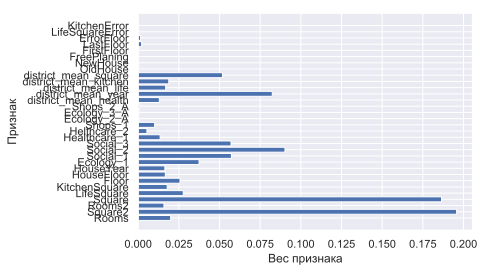

In [155]:
trf = RF(n_estimators=400, max_depth=26, min_samples_leaf=1, min_samples_split=5, random_state=100, max_features=0.5, n_jobs = -1)
trf.fit(train.loc[:, fts], train['Price'])
trf.feature_importances_
plt.barh(train.loc[:, fts].columns, trf.feature_importances_.flatten())
plt.xlabel('Вес признака')
plt.ylabel('Признак')


scores = cross_val_score(trf, train.loc[:, fts], train['Price'], scoring='r2', cv=10, n_jobs=-1)
print(f'cv mean: {np.round(np.mean(scores), 4)}')
print(f'cv std:  {np.round(np.std(scores), 4)}')

In [ ]:
rf_r2_valid_max > 0.7301565392716712

In [ ]:
#knn_r2_valid_max = 0
#for i in range(10, 60, 2):
    #knn = KNN(n_neighbors=i)
    #knn.fit(train_scaled, train['Price'])
    #knn_pred = knn.predict(train_scaled)
    #knn_r2_train = r2(train['Price'], knn_pred)
    #knn_pred_valid = knn.predict(valid_scaled)
    #knn_r2_valid = r2(valid['Price'], knn_pred_valid)
    #if knn_r2_valid_max < knn_r2_valid:
        #knn_r2_valid_max = knn_r2_valid
        #knn_r2_train_max = knn_r2_train
        #knn_i_max = i
#print(knn_r2_train_max, knn_r2_valid_max, knn_i_max, '\n')

In [ ]:
print('linar_regression \n', lr_r2_train, lr_r2_valid, '\n')
print('forest \n', rf_r2_train_max, rf_r2_valid_max, rf_i_max, '\n')
#print('KNN \n', knn_r2_train_max, knn_r2_valid_max, knn_i_max, '\n')

Предсказание на тесте

In [ ]:
pred_test = trf.predict(test.loc[:, fts])
pred_test.shape

In [ ]:
test['Price'] = pred_test

In [ ]:
test.head()

In [ ]:
#test.loc[:, ['Id', 'Price']].to_csv('output/APetrov_predictions.csv', index=None)